In [49]:
from keras.datasets import imdb
import numpy as np
from keras import models,layers,optimizers,losses,metrics
import matplotlib.pyplot as plt
from tensorflow.python.keras import regularizers

In [50]:
from keras.layers import Dropout
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

print(train_data[0])
print(train_label[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [51]:
max(max([max(sequence for sequence in train_data)]))

9995

In [52]:
word_index=imdb.get_word_index()
reversed_word_index=dict([(value,key) for (key,value) in word_index.items()])
decode_review=' '.join([reversed_word_index.get(i-3,'?') for i in train_data[0]])
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [53]:
def vectorize_sequence(sequence,demension=10000):
    results=np.zeros((len(sequence),demension))
    for i,sequence in enumerate(sequence):
        results[i,sequence]=1.
    return results


In [54]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [55]:
y_train=np.asarray(train_label).astype('float32')
y_test=np.asarray(test_label).astype('float32')
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [56]:
model =models.Sequential()
model.add(layers.Dense(16,input_shape=(10000,),activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [57]:
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=optimizers.Adam(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [59]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]



In [60]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.8185 - binary_accuracy: 0.6799 - val_loss: 0.6366 - val_binary_accuracy: 0.8513

In [61]:
history_dict=history.history
for i in history_dict.keys():
    print(i)

val_loss
val_binary_accuracy
loss
binary_accuracy


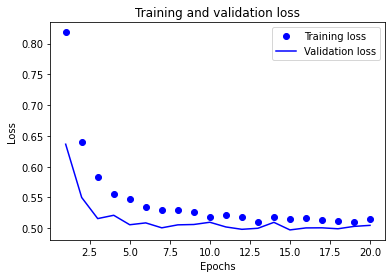

In [62]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"（'bo' 表示蓝色圆点）
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"（'b' 表示蓝色实线）
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


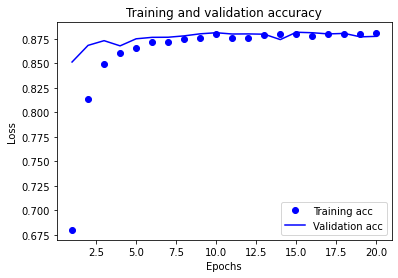

In [63]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [64]:
results=model.evaluate(x_test,y_test)
print(results)

25000/25000 [==============================] - 2s 99us/step